In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer

In [19]:
# Read in data 
df = pd.read_csv("jamb_exam_results.csv")
df.columns = df.columns.str.lower().str.replace(' ', '_')
df = df.drop(columns=['student_id'])
df.fillna(0, inplace=True)

In [20]:
# Split the data into train, validation and test (60%/20%/20%)
train_df, temp_df = train_test_split(df, test_size=0.4, random_state=1)
validation_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=1)

# Get target variables
y_train = train_df['jamb_score']
y_validation = validation_df['jamb_score']
y_test = test_df['jamb_score']

# Prepare data for DictVectorizer
train_dicts = train_df.drop(columns='jamb_score').to_dict(orient='records')
validation_dicts = validation_df.drop(columns='jamb_score').to_dict(orient='records')
test_dicts = test_df.drop(columns='jamb_score').to_dict(orient='records')

# Initialize DictVectorizer
dv = DictVectorizer(sparse=True)

# Transform the dictionaries into sparse matrices
X_train = dv.fit_transform(train_dicts)
X_validation = dv.transform(validation_dicts)
X_test = dv.transform(test_dicts)

### Q1

In [21]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
# train a decision tree regressor
model = DecisionTreeRegressor(max_depth=1)
model.fit(X_train, y_train)

# Getting the feature importances or tree structure
importances = model.feature_importances_
feature_importances = pd.DataFrame({
    'Feature': dv.get_feature_names_out(),
    'Importance': importances
})

# Sort the DataFrame by importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
print(feature_importances)

DecisionTreeRegressor(max_depth=1)

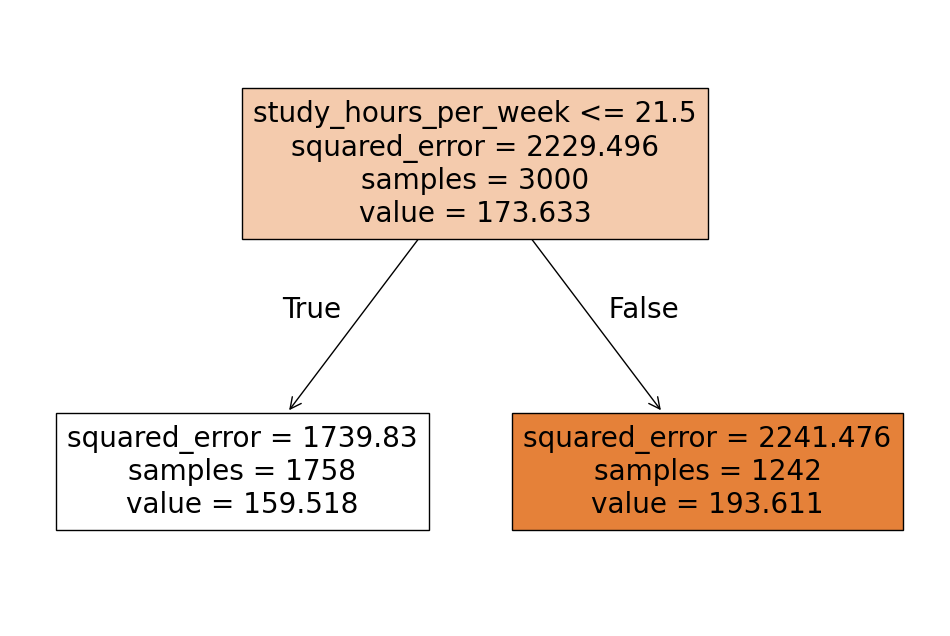

In [29]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plot_tree(model, feature_names=dv.get_feature_names_out(), filled=True)
plt.show()

### Q2

In [30]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [31]:
# Train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=10, random_state=1, n_jobs=-1)
rf_model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = rf_model.predict(X_validation)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_validation, y_pred))

print("RMSE on validation set:", rmse)

RMSE on validation set: 43.157758977963624


### Q3

n_estimators: 10, RMSE: 43.158
n_estimators: 20, RMSE: 41.790
n_estimators: 30, RMSE: 41.556
n_estimators: 40, RMSE: 41.076
n_estimators: 50, RMSE: 40.957
n_estimators: 60, RMSE: 40.774
n_estimators: 70, RMSE: 40.588
n_estimators: 80, RMSE: 40.503
n_estimators: 90, RMSE: 40.435
n_estimators: 100, RMSE: 40.365
n_estimators: 110, RMSE: 40.348
n_estimators: 120, RMSE: 40.302
n_estimators: 130, RMSE: 40.286
n_estimators: 140, RMSE: 40.263
n_estimators: 150, RMSE: 40.254
n_estimators: 160, RMSE: 40.200
n_estimators: 170, RMSE: 40.187
n_estimators: 180, RMSE: 40.136
n_estimators: 190, RMSE: 40.152
n_estimators: 200, RMSE: 40.138


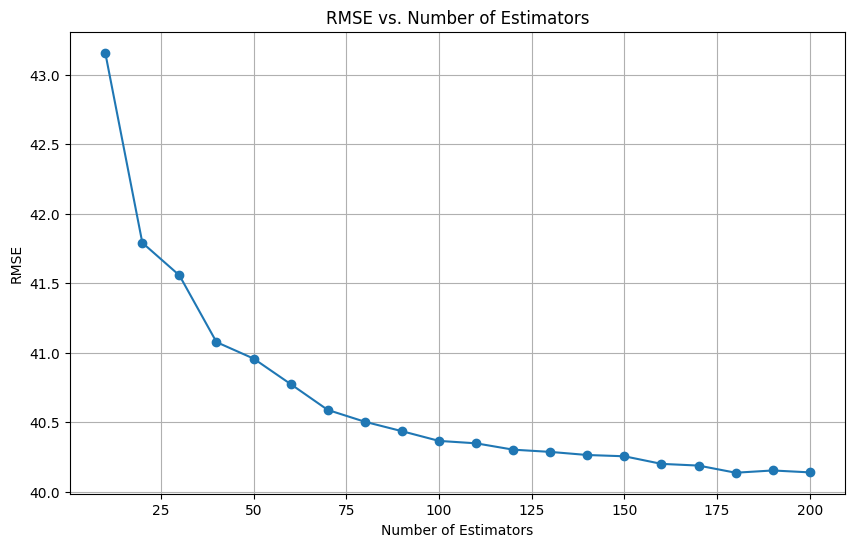

In [35]:
# Initialize a list to store RMSE values
rmse_values = []
n_estimators_values = range(10, 201, 10)

# Experiment with different values of n_estimators
for n in n_estimators_values:
    rf_model = RandomForestRegressor(n_estimators=n, random_state=1, n_jobs=-1)
    rf_model.fit(X_train, y_train)
    y_pred = rf_model.predict(X_validation)
    rmse = np.sqrt(mean_squared_error(y_validation, y_pred))
    rmse_values.append(rmse)
    print(f'n_estimators: {n}, RMSE: {rmse:.3f}')

# Plot RMSE against n_estimators
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_values, rmse_values, marker='o')
plt.title('RMSE vs. Number of Estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('RMSE')
plt.grid()
plt.show()

### Q4

In [36]:
# Define max_depth and n_estimators values
max_depth_values = [10, 15, 20, 25]
n_estimators_values = range(10, 201, 10)

# Initialize a dictionary to store mean RMSE values
mean_rmse_results = {}

# Experiment with different values of max_depth and n_estimators
for max_depth in max_depth_values:
    rmse_list = []
    for n in n_estimators_values:
        rf_model = RandomForestRegressor(n_estimators=n, max_depth=max_depth, random_state=1, n_jobs=-1)
        rf_model.fit(X_train, y_train)
        y_pred = rf_model.predict(X_validation)
        rmse = np.sqrt(mean_squared_error(y_validation, y_pred))
        rmse_list.append(rmse)

    mean_rmse = np.mean(rmse_list)
    mean_rmse_results[max_depth] = mean_rmse
    print(f'max_depth: {max_depth}, Mean RMSE: {mean_rmse:.3f}')

# Determine the best max_depth based on mean RMSE
best_max_depth = min(mean_rmse_results, key=mean_rmse_results.get)
print(f'Best max_depth: {best_max_depth} with Mean RMSE: {mean_rmse_results[best_max_depth]:.3f}')

max_depth: 10, Mean RMSE: 40.138
max_depth: 15, Mean RMSE: 40.644
max_depth: 20, Mean RMSE: 40.610
max_depth: 25, Mean RMSE: 40.688
Best max_depth: 10 with Mean RMSE: 40.138


### Q5

In [37]:
# Train the Random Forest model with specified parameters
rf_model = RandomForestRegressor(n_estimators=10, max_depth=20, random_state=1, n_jobs=-1)
rf_model.fit(X_train, y_train)

# Get feature importances
importances = rf_model.feature_importances_

# Create a DataFrame for better visualization
feature_importances = pd.DataFrame({
    'Feature': dv.get_feature_names_out(),
    'Importance': importances
})

# Sort the DataFrame by importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Print feature importances
print(feature_importances)

                             Feature  Importance
27              study_hours_per_week    0.254075
4                    attendance_rate    0.152135
5                 distance_to_school    0.135761
28                   teacher_quality    0.081733
2                                age    0.064395
3              assignments_completed    0.034429
17           parent_involvement=High    0.025249
24         socioeconomic_status=High    0.018695
10                 it_knowledge=High    0.016275
18            parent_involvement=Low    0.016064
15  parent_education_level=Secondary    0.014632
16   parent_education_level=Tertiary    0.014306
25          socioeconomic_status=Low    0.013721
11                  it_knowledge=Low    0.013349
26       socioeconomic_status=Medium    0.012501
14    parent_education_level=Primary    0.012056
12               it_knowledge=Medium    0.011727
6                 extra_tutorials=No    0.011601
19         parent_involvement=Medium    0.011180
7                ext

### Q6

In [39]:
import xgboost as xgb

XGBoostError: 
XGBoost Library (libxgboost.dylib) could not be loaded.
Likely causes:
  * OpenMP runtime is not installed
    - vcomp140.dll or libgomp-1.dll for Windows
    - libomp.dylib for Mac OSX
    - libgomp.so for Linux and other UNIX-like OSes
    Mac OSX users: Run `brew install libomp` to install OpenMP runtime.

  * You are running 32-bit Python on a 64-bit OS

Error message(s): ["dlopen(/Users/changhengchen/.local/share/virtualenvs/hw6-98hurBd4/lib/python3.11/site-packages/xgboost/lib/libxgboost.dylib, 0x0006): Library not loaded: @rpath/libomp.dylib\n  Referenced from: <B22D7F05-77FA-34A6-8757-C605D2CFE1AD> /Users/changhengchen/.local/share/virtualenvs/hw6-98hurBd4/lib/python3.11/site-packages/xgboost/lib/libxgboost.dylib\n  Reason: tried: '/usr/local/opt/libomp/lib/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/usr/local/opt/libomp/lib/libomp.dylib' (no such file), '/usr/local/opt/libomp/lib/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/usr/local/opt/libomp/lib/libomp.dylib' (no such file), '/Users/changhengchen/.pyenv/versions/3.11.10/lib/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/Users/changhengchen/.pyenv/versions/3.11.10/lib/libomp.dylib' (no such file), '/Users/changhengchen/.pyenv/versions/3.11.10/lib/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/Users/changhengchen/.pyenv/versions/3.11.10/lib/libomp.dylib' (no such file)"]
